In [68]:
inp_file = open('8.txt', 'r')
inp = inp_file.read()
lines = inp.split('\n')[:-1]

In [69]:
import numpy as np
import re

# Part 1

In [70]:
def rect(num_row, num_col, display):
    display[0:num_col, 0:num_row] = 1
    return display

def rot_row(row, num, display):
    display[row] = np.roll(display[row], num)
    return display

def rot_col(col, num, display):
    display[:, col] = np.roll(display[:, col], num)
    return display

def apply_command(display, command):
    pat_rect = r'rect ([0-9]+)x([0-9]+)'
    pat_rot_row = r'rotate row y=([0-9]+) by ([0-9]+)'
    pat_rot_col = r'rotate column x=([0-9]+) by ([0-9]+)'
    patterns = [pat_rect, pat_rot_row, pat_rot_col]
    m_rect, m_row, m_col = map(lambda p: re.match(p, command), patterns)
    
    if sum(map(lambda x: x is not None, [m_rect, m_row, m_col])) != 1:
        print('Pattern match error')
        
    if m_rect is not None:
        return rect(int(m_rect.group(1)), int(m_rect.group(2)), display)
    elif m_row is not None:
        return rot_row(int(m_row.group(1)), int(m_row.group(2)), display)
    elif m_col is not None:
        return rot_col(int(m_col.group(1)), int(m_col.group(2)), display)
    else:
        return None

In [72]:
end_display = reduce(apply_command, lines, np.zeros((6, 50)))
np.sum(end_display)

110.0

# Part 2

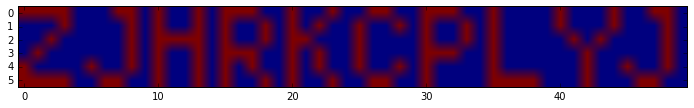

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,100))
plt.imshow(end_display)